In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("Boston Dataset.csv")

In [6]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
df = df.drop(columns=['Unnamed: 0'])

In [12]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [14]:
df.shape

(506, 14)

In [15]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

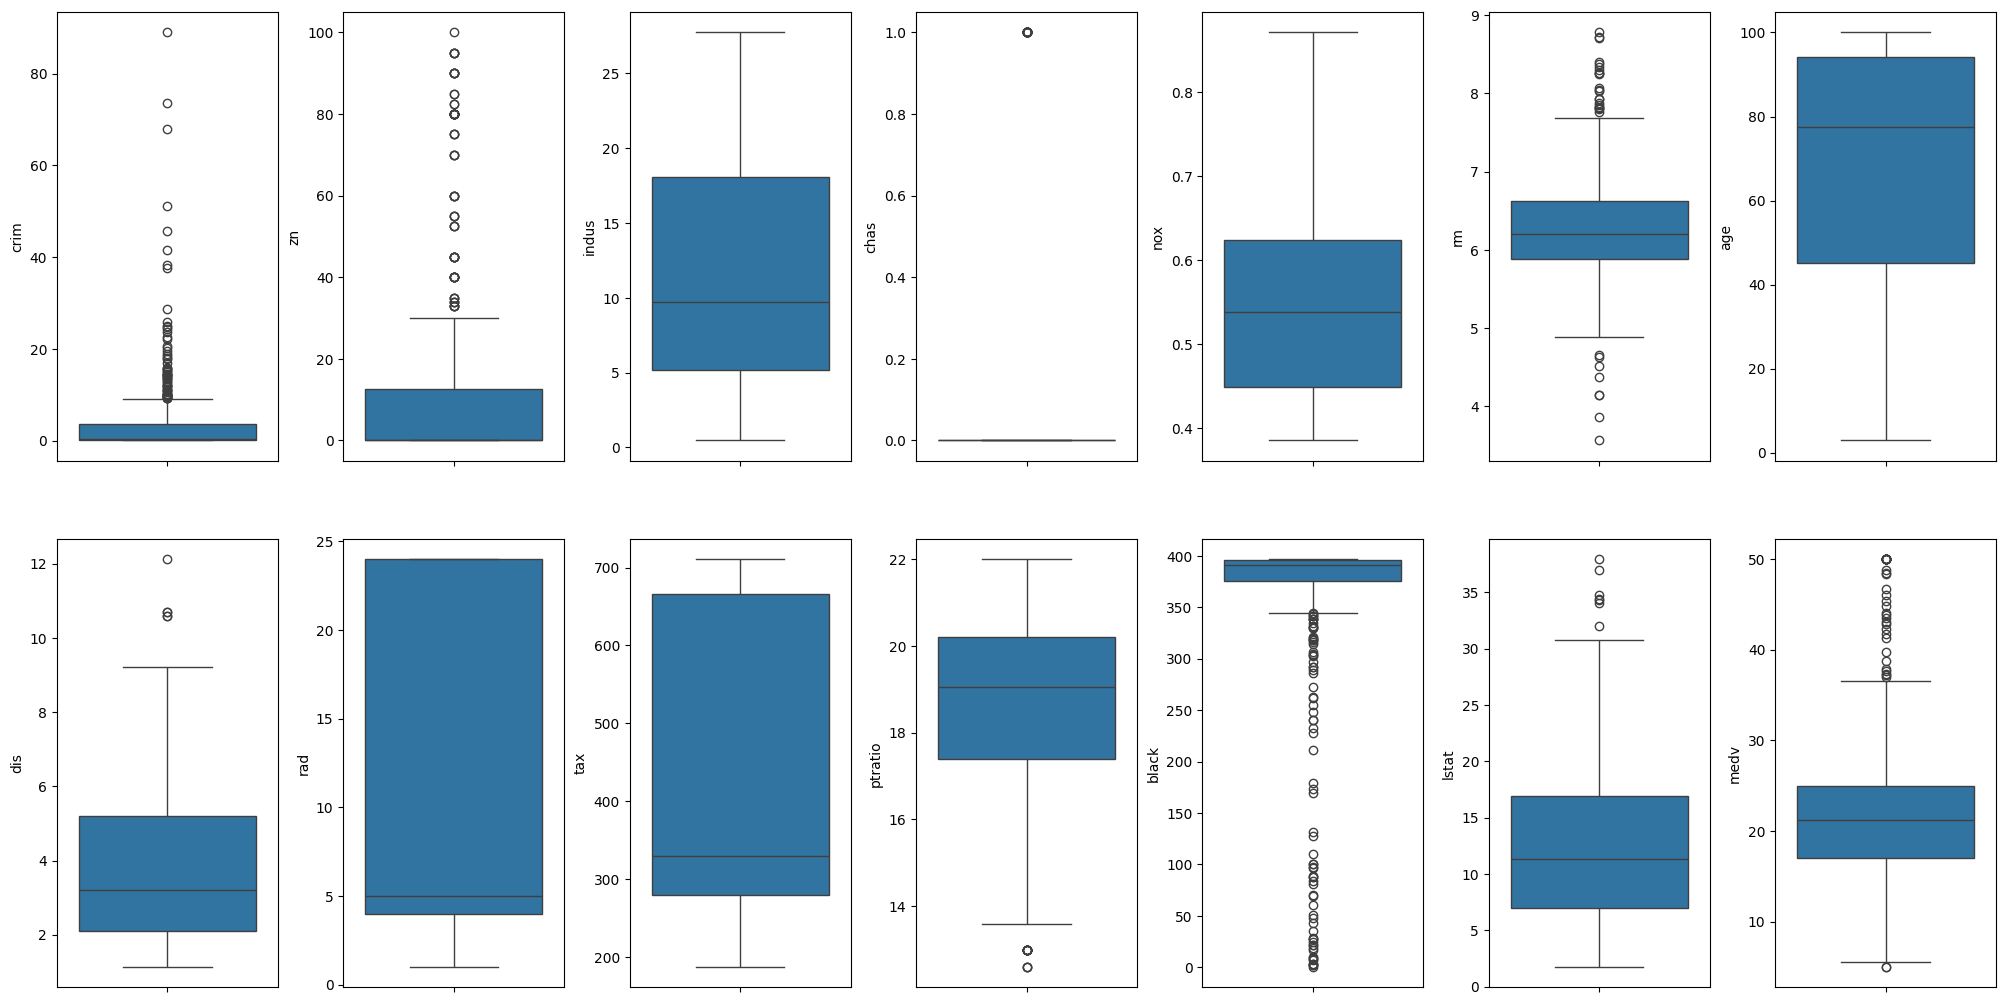

In [20]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize = (20,10))
index = 0
ax = ax.flatten()

for col, values in df.items():
    sns.boxplot(y = col, data = df, ax = ax[index])
    index +=1
plt.tight_layout(pad = 0.5,w_pad=0.7,h_pad=5.0)

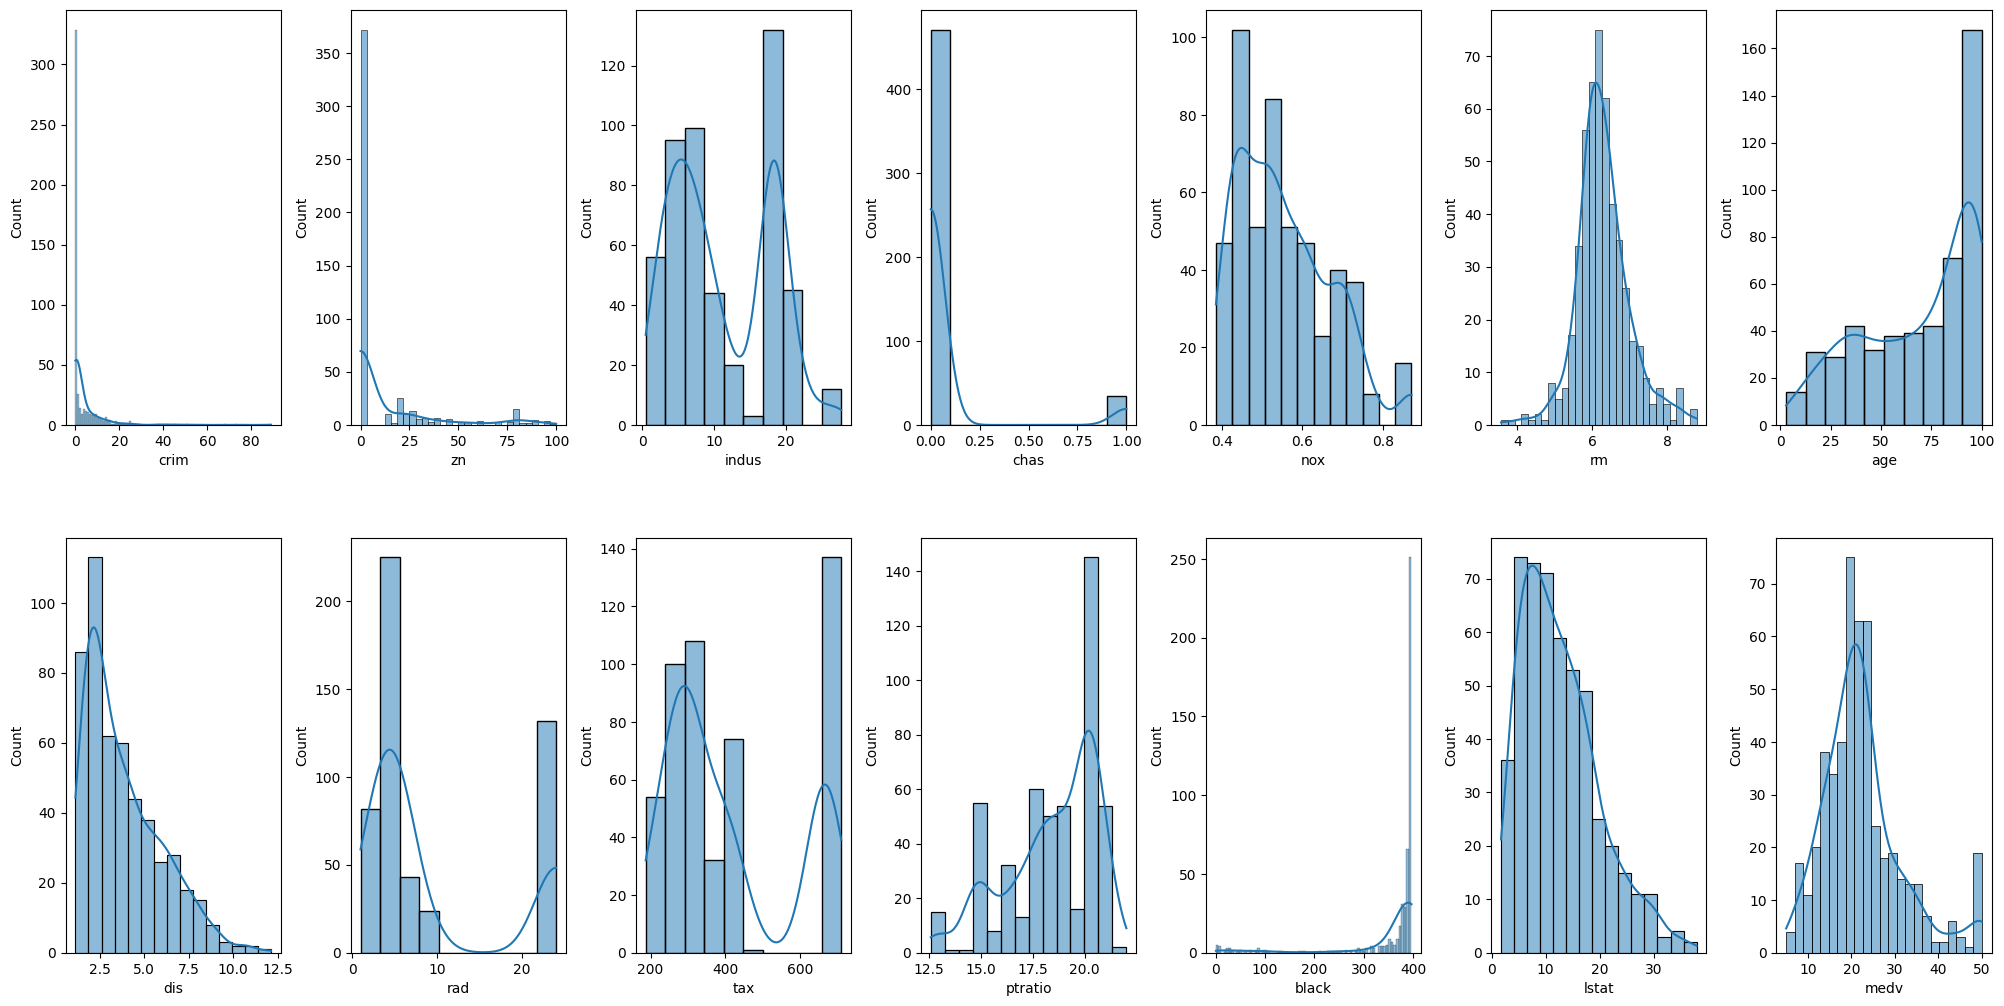

In [24]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize = (20,10))
index = 0
ax = ax.flatten()

for col, values in df.items():
    sns.histplot(values, ax = ax[index],kde=True)
    index +=1
plt.tight_layout(pad = 0.5,w_pad=0.7,h_pad=5.0)

In [25]:
cols = ['crim','zn','tax','black']
for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col]- minimum)/(maximum - minimum)


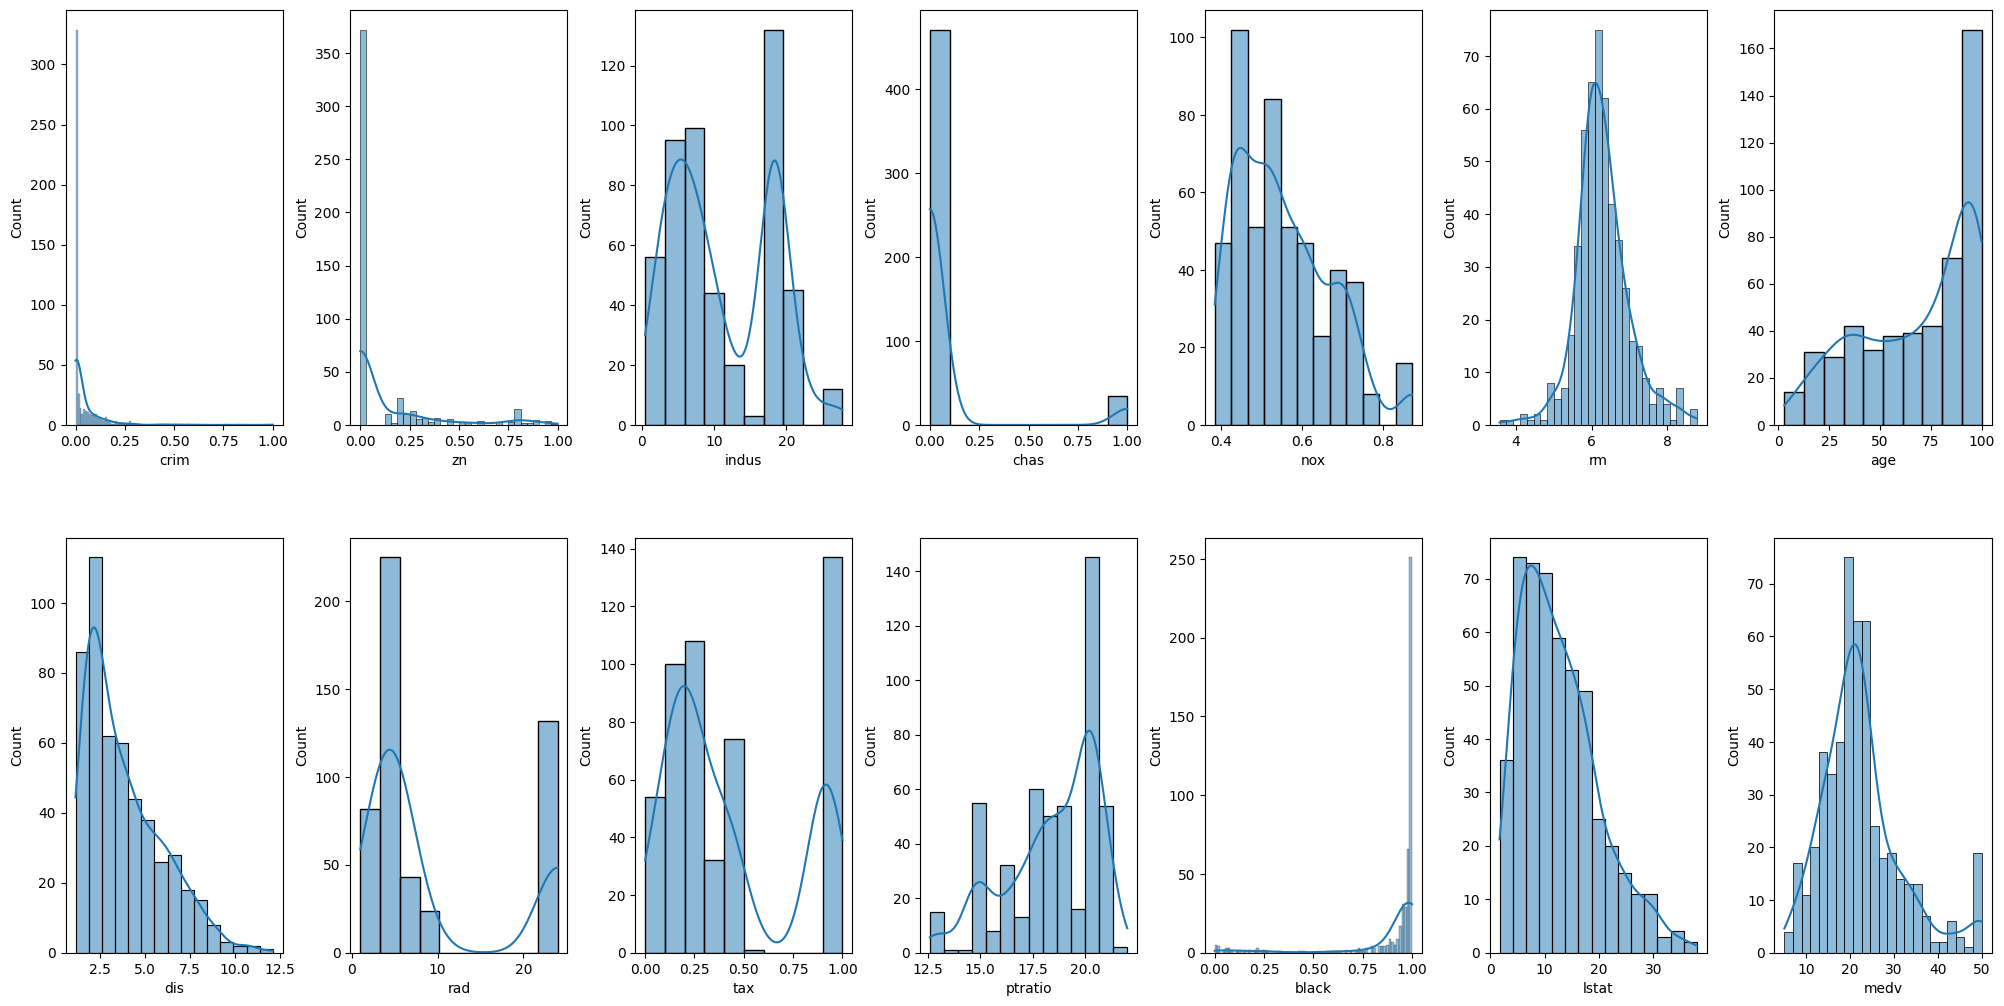

In [26]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize = (20,10))
index = 0
ax = ax.flatten()

for col, values in df.items():
    sns.histplot(values, ax = ax[index],kde=True)
    index +=1
plt.tight_layout(pad = 0.5,w_pad=0.7,h_pad=5.0)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols,columns=cols)

In [28]:
scaled_cols.head()

,crim,zn,tax,black
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [29]:
for col in cols:
    df[col] = scaled_cols[col]

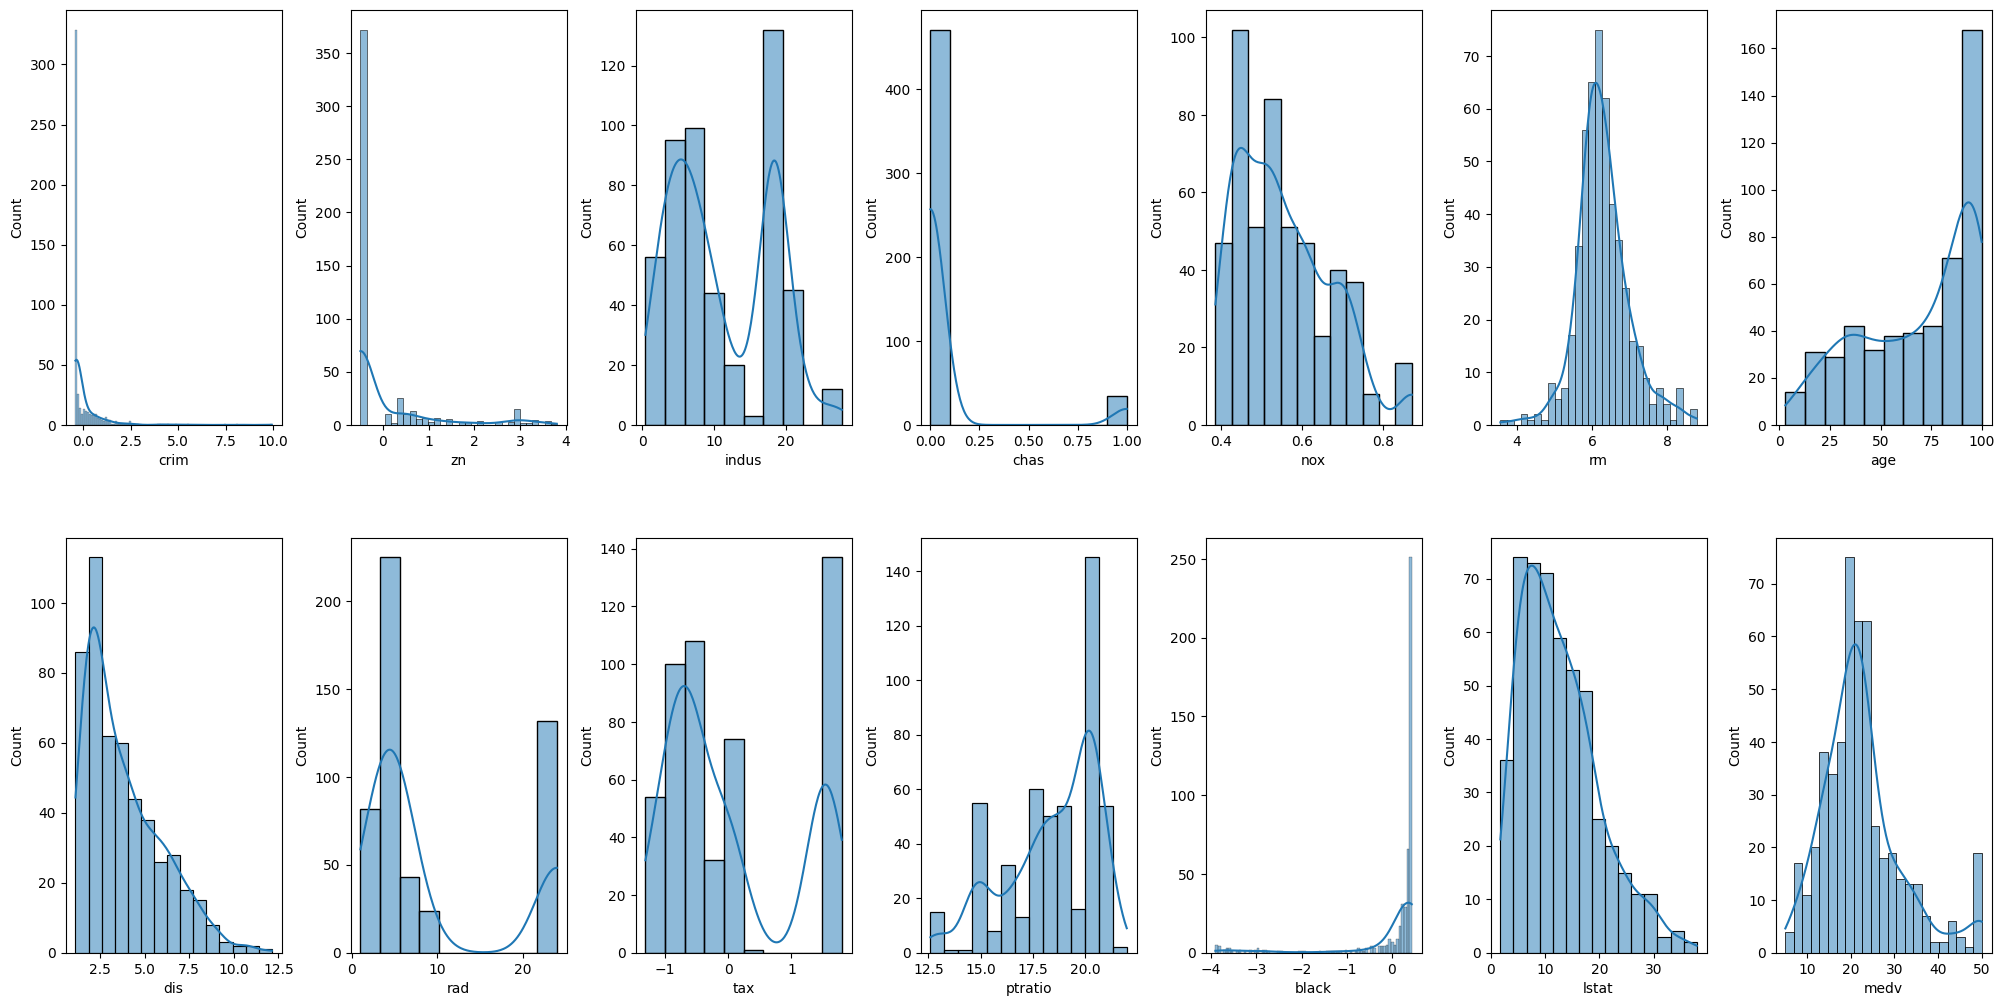

In [30]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize = (20,10))
index = 0
ax = ax.flatten()

for col, values in df.items():
    sns.histplot(values, ax = ax[index],kde=True)
    index +=1
plt.tight_layout(pad = 0.5,w_pad=0.7,h_pad=5.0)

<Axes: >

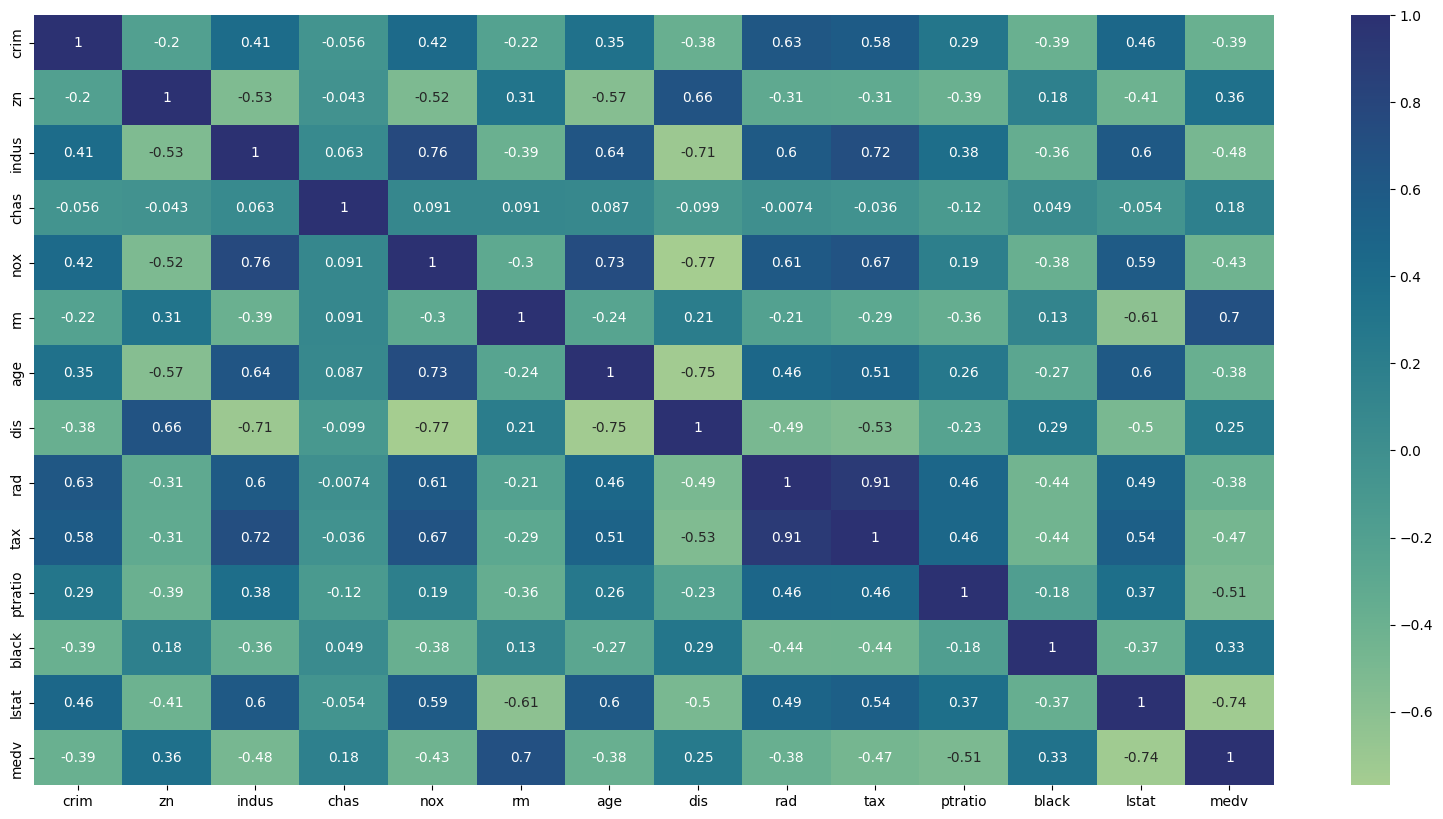

In [35]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='crest' )

<Axes: xlabel='lstat', ylabel='medv'>

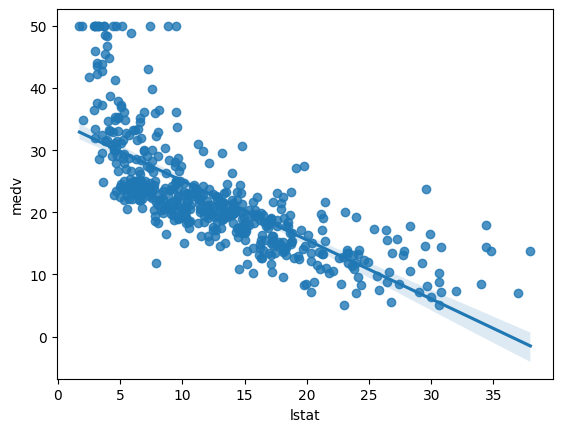

In [36]:
sns.regplot(y = df['medv'], x = df['lstat'])


<Axes: xlabel='rm', ylabel='medv'>

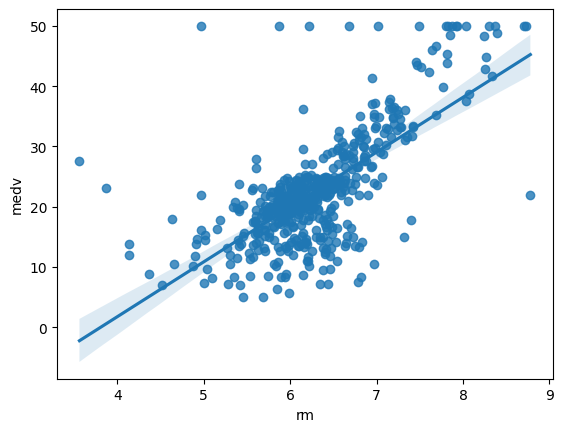

In [37]:
sns.regplot(y = df['medv'], x = df['rm'])

In [38]:
X = df.drop(columns=['medv','rad'])
y = df['medv']

In [42]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


In [45]:
def train(model,x,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size= 0.2)
    model.fit(X,y)
    
    pred = model.predict(X)

    cv_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv = 5)
    cv_score = np.abs(np.mean(cv_score))

    print("model report : ")
    print("MSE: ", mean_squared_error(y,pred))
    print("cv score: ",cv_score)

In [46]:
from sklearn.linear_model import LinearRegression
m1 = LinearRegression()
train(m1, X,y)

model report : 
MSE:  22.84177569989202
cv score:  35.58136621076917


In [50]:
from sklearn.tree import DecisionTreeRegressor
m2 = DecisionTreeRegressor()
train(m2,X,y)

model report : 
MSE:  0.0
cv score:  42.780054940788204


In [51]:
from sklearn.ensemble import RandomForestRegressor
m3 = RandomForestRegressor()
train(m3,X,y)

model report : 
MSE:  1.325564458498023
cv score:  21.050041016462806


In [57]:
import xgboost as xgb
m4 = xgb.XGBRegressor()
train(m4,X,y)

model report : 
MSE:  0.001238754756417038
cv score:  26.900319661354462


In [55]:
import lightgbm as lgb
m5 = lgb.LGBMRegressor()
train(m4,X,y)

model report : 
MSE:  0.001238754756417038
cv score:  26.900319661354462


In [56]:
import catboost as ctb
m6 = ctb.CatBoostRegressor()
train(m5,X,y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1244
[LightGBM] [Info] Number of data points in the train set: 506, number of used features: 12
[LightGBM] [Info] Start training from score 22.532806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 